# Get the Data 

In [1]:
import pandas as pd 

data = pd.read_csv("../datasets/attribute_set/train_val_data_fine_grained_all.csv", index_col=0) 

In [2]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 0 to 1999
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   paths            16000 non-null  object
 1   floral           16000 non-null  int64 
 2   graphic          16000 non-null  int64 
 3   striped          16000 non-null  int64 
 4   embroidered      16000 non-null  int64 
 5   pleated          16000 non-null  int64 
 6   solid            16000 non-null  int64 
 7   lattice          16000 non-null  int64 
 8   long_sleeve      16000 non-null  int64 
 9   short_sleeve     16000 non-null  int64 
 10  sleeveless       16000 non-null  int64 
 11  maxi_length      16000 non-null  int64 
 12  mini_length      16000 non-null  int64 
 13  no_dress         16000 non-null  int64 
 14  crew_neckline    16000 non-null  int64 
 15  v_neckline       16000 non-null  int64 
 16  square_neckline  16000 non-null  int64 
 17  no_neckline      16000 non-null 

In [3]:
data["paths"] = data.paths.apply(lambda s: s.replace("img-001/img", "img_highres/img_highres"))
data.head() 

,paths,floral,graphic,striped,embroidered,pleated,solid,lattice,long_sleeve,short_sleeve,...,no_neckline,denim,chiffon,cotton,leather,faux,knit,tight,loose,conventional
0,../datasets/big_ds/img_highres/img_highres/Swe...,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1,../datasets/big_ds/img_highres/img_highres/Cla...,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,../datasets/big_ds/img_highres/img_highres/Str...,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,../datasets/big_ds/img_highres/img_highres/Mid...,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,1,0,0
4,../datasets/big_ds/img_highres/img_highres/Zip...,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1


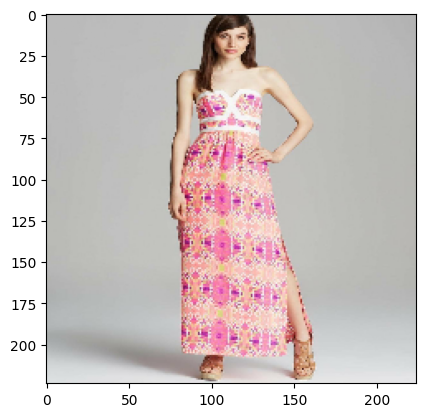

In [4]:
from helpers import show_image
show_image(data.iat[2,0])

In [5]:
data = data.loc[:, [
    "paths",
    "floral", 
    "graphic" ,
    "striped",
    "embroidered",
    "solid",
    "lattice",
    "denim",
    "chiffon",
    "cotton",
    "leather",
    "faux",
    "knit",
    "tight",
    "loose"
]]

In [6]:
data.columns = [
    "paths",
    "cicekli", 
    "baskili", 
    "duz-cizgi",
    "islemeli", 
    "solid", 
    "kafes",
    "denim",
    "sifon", 
    "pamuk", 
    "deri", 
    "kurk", 
    "orme", 
    "dar",
    "bol-gevsek" 
]

In [7]:
for c in data.columns[1:]: 
    print(f"{c} , positive: {len(data[data[c] == 1])} negative: {len(data[data[c] == 0])} ")

cicekli , positive: 2738 negative: 13262 
baskili , positive: 2678 negative: 13322 
duz-cizgi , positive: 1055 negative: 14945 
islemeli , positive: 1329 negative: 14671 
solid , positive: 7584 negative: 8416 
kafes , positive: 280 negative: 15720 
denim , positive: 949 negative: 15051 
sifon , positive: 2342 negative: 13658 
pamuk , positive: 10868 negative: 5132 
deri , positive: 330 negative: 15670 
kurk , positive: 143 negative: 15857 
orme , positive: 1368 negative: 14632 
dar , positive: 2296 negative: 13704 
bol-gevsek , positive: 868 negative: 15132 


In [8]:
# data = data.drop(["kafes", "deri", "kurk"], axis=1) 

In [9]:
DATA_SIZE = data.shape[0]
TRAIN_SIZE = int(0.70 * DATA_SIZE)
TRAIN_SIZE 

11200

# Shuffle Training Data 

In [10]:
data = data.sample(frac=1, random_state=128)
trainig_data = data.iloc[:TRAIN_SIZE, :].reset_index(drop=True)
val_data = data.iloc[TRAIN_SIZE:, :].reset_index(drop=True)
trainig_data.shape, val_data.shape, data.shape 

((11200, 15), (4800, 15), (16000, 15))

In [11]:
trainig_data.head() 

,paths,cicekli,baskili,duz-cizgi,islemeli,solid,kafes,denim,sifon,pamuk,deri,kurk,orme,dar,bol-gevsek
0,../datasets/big_ds/img_highres/img_highres/Cow...,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,../datasets/big_ds/img_highres/img_highres/Dip...,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,../datasets/big_ds/img_highres/img_highres/Hea...,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,../datasets/big_ds/img_highres/img_highres/Dai...,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,../datasets/big_ds/img_highres/img_highres/Tas...,0,0,0,1,0,0,0,0,0,0,0,1,0,0


# Distribution of Train - Val Set 

In [12]:
import seaborn as sns 
import matplotlib.pyplot as plt 

def show_distribution(dt: pd.DataFrame):
    train_dist = dict()
    for c in dt.columns[1:]: 
        train_dist[c] = len(dt[dt[c] == 1]) 

    train_dist = pd.DataFrame.from_dict(train_dist, orient="index").reset_index()
    train_dist.columns= ["rows", "vals"]

    sns.barplot(x="rows", y="vals", data=train_dist)
    plt.show()

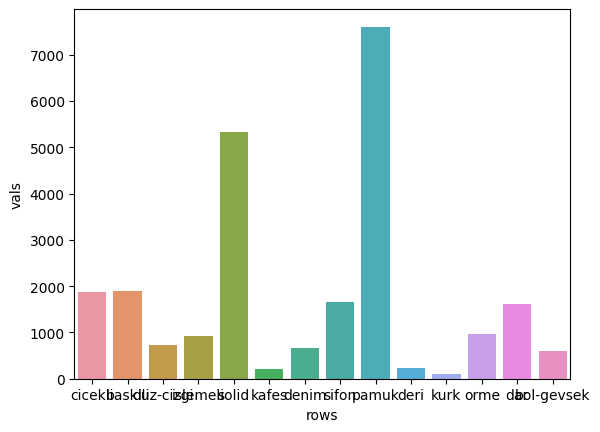

In [13]:
show_distribution(trainig_data)

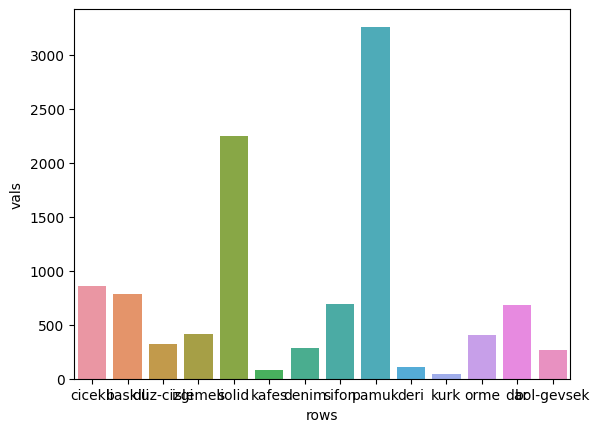

In [14]:
show_distribution(val_data)

# Create Keras Data Generators 

In [15]:
X_train = trainig_data.iloc[:, 0] 
y_train = trainig_data.iloc[:, 1:]

X_test = val_data.iloc[:, 0] 
y_test = val_data.iloc[:, 1:] 

In [16]:
merged_all_classes = [] 
for idx, row in y_train.iterrows():
    merged_all_classes.append([col for col, val in row.items() if val == 1])

y_train = pd.Series(merged_all_classes, index=y_train.index, name="labels") 

merged_all_classes = [] 
for idx, row in y_test.iterrows():
    merged_all_classes.append([col for col, val in row.items() if val == 1])

y_test = pd.Series(merged_all_classes, index=y_test.index, name="labels") 

In [17]:
train_data_flow_df = pd.concat([
    X_train, 
    y_train
], axis=1)

test_data_flow_df = pd.concat([
    X_test, 
    y_test
], axis=1) 

In [18]:
IMG_WIDTH = 456 
IMG_HEIGHT = 456 
nr_of_classes = 14

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

train_gen = ImageDataGenerator() 
test_gen = ImageDataGenerator()

In [20]:
train = train_gen.flow_from_dataframe(
    dataframe=train_data_flow_df, 
    directory="", 
    x_col="paths", 
    y_col="labels", 
    class_mode='categorical', 
    target_size=(IMG_WIDTH, IMG_HEIGHT))

test = test_gen.flow_from_dataframe(
    dataframe=test_data_flow_df, 
    directory="", 
    x_col="paths", 
    y_col="labels", 
    class_mode='categorical', 
    target_size=(IMG_WIDTH, IMG_HEIGHT))

Found 11200 validated image filenames belonging to 14 classes.
Found 4800 validated image filenames belonging to 14 classes.


In [21]:
for b in train: 
    print(b[0].shape)
    break

(32, 456, 456, 3)


# Test Data 

In [22]:
test_data = pd.read_csv("../datasets/attribute_set/test_data_fine_grained.csv", index_col=0)
test_data["paths"] = test_data.paths.apply(lambda s: s.replace("img-001/img", "img_highres/img_highres"))

test_data = test_data.loc[:, [
    "paths",
    "floral", 
    "graphic" ,
    "striped",
    "embroidered",
    "solid",
    "lattice",
    "denim",
    "chiffon",
    "cotton",
    "leather",
    "faux",
    "knit",
    "tight",
    "loose"
]]

test_data.columns = [
    "paths",
    "cicekli", 
    "baskili", 
    "duz-cizgi",
    "islemeli", 
    "solid", 
    "kafes",
    "denim",
    "sifon", 
    "pamuk", 
    "deri", 
    "kurk", 
    "orme", 
    "dar",
    "bol-gevsek" 
]

test_data.head() 

,paths,cicekli,baskili,duz-cizgi,islemeli,solid,kafes,denim,sifon,pamuk,deri,kurk,orme,dar,bol-gevsek
0,../datasets/big_ds/img_highres/img_highres/Flo...,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,../datasets/big_ds/img_highres/img_highres/But...,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,../datasets/big_ds/img_highres/img_highres/Mar...,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,../datasets/big_ds/img_highres/img_highres/Sun...,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,../datasets/big_ds/img_highres/img_highres/Col...,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [23]:
from PIL import Image
import os

max_pixel_limit = 178956970
batch=0
i = 0

for k,row in test_data.iterrows():
    try:
        image = Image.open(row["paths"])
        total_pixels = image.size[0] * image.size[1]
        if total_pixels > max_pixel_limit:
            print(f"Removed {i} - Exceeds pixel limit")

        i = i + 1 
        if i >= 31:
            i = 0 
            batch = batch + 1 
    except Exception as e:
        print(f"batch:{batch} index:{k}")



batch:121 index:3778


In [24]:
test_data = test_data.drop([3778])

In [25]:
X_test2 = test_data.iloc[:, 0] 
y_test2 = test_data.iloc[:, 1:] 

merged_all_classes = [] 
for idx, row in y_test2.iterrows():
    merged_all_classes.append([col for col, val in row.items() if val == 1])

y_test2 = pd.Series(merged_all_classes, index=y_test2.index, name="labels") 

test2_data_flow_df = pd.concat([
    X_test2, 
    y_test2
], axis=1) 

In [26]:
test2_gen = ImageDataGenerator() 
test_2 = test2_gen.flow_from_dataframe(
    dataframe=test2_data_flow_df, 
    directory="", 
    x_col="paths", 
    y_col="labels", 
    class_mode='categorical', 
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    shuffle=False)

Found 3999 validated image filenames belonging to 14 classes.


# Model 1: EfficientNetB5 

In [27]:
from tensorflow import keras 
import tensorflow as tf 

In [28]:
model_1_loaded = tf.keras.models.load_model("../trained_models/efnet_high_res_based12.h5")

In [29]:
# model_1_loaded.evaluate(test_2)

In [ ]:
from helpers import predict 
y_preds = predict(test_data.paths.to_numpy(), model_1_loaded, dims=(456, 456, 3))

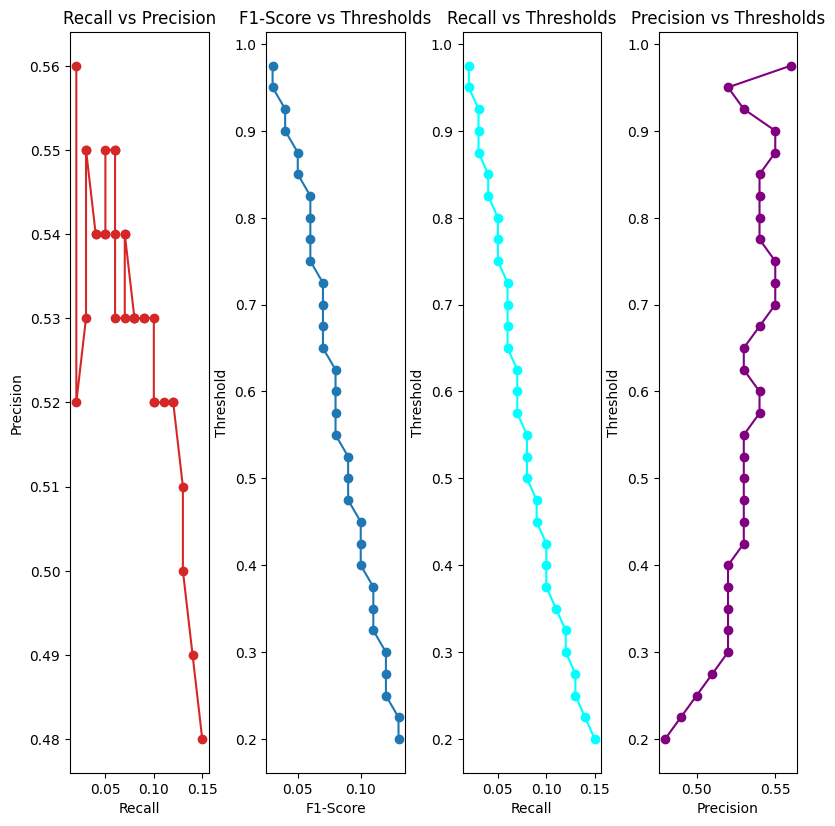

In [32]:
from helpers import plot_recall_precision_curve
import numpy as np 
plot_recall_precision_curve(np.squeeze(y_preds),test_data.iloc[:, 1:].to_numpy())

In [33]:
model_1_loaded.evaluate(test_2)

125/125 [==============================] - 2368s 19s/step - loss: 0.1857 - accuracy: 0.9257 - precision: 0.7881 - recall: 0.7154


[0.18573661148548126,
 0.9257314205169678,
 0.7880702614784241,
 0.7153837084770203]

In [75]:
from sklearn.metrics import multilabel_confusion_matrix
y_hats = np.squeeze(y_preds)
y_hats[y_hats >= 0.5] = 1 
y_hats[y_hats < 0.5] = 0 

conf_mat = multilabel_confusion_matrix(test_data.iloc[:, 1:].to_numpy(), y_hats)

In [57]:
TP_ACC = 0 
FP_ACC = 0 
FN_ACC = 0 
for mat in conf_mat: 
    TP_ACC +=  mat[1][1] 
    FP_ACC += mat[0][1]
    FN_ACC += mat[1][0] 

print("micro average precision:", TP_ACC / (TP_ACC + FP_ACC))
print("micro average recall:", TP_ACC / (TP_ACC + FN_ACC))

micro average precision: 0.09037130270610447
micro average recall: 0.08236778708271195


In [82]:
PREC_ACC = 0 
REC_ACC = 0 

for mat in conf_mat: 
    PREC_ACC += mat[1][1]  / (mat[1][1]  + mat[0][1])
    REC_ACC += mat[1][1]  / (mat[1][1]  + mat[1][0])

print("macro average precision:", PREC_ACC / len(conf_mat))
print("macro average recall:", REC_ACC / len(conf_mat))

macro average precision: 0.20071172497898998
macro average recall: 0.11039744320357385


In [77]:
last_yhats = y_hats[:,0]

In [78]:
last_actuals = test_data.iloc[:, 1:].to_numpy()[:, 0]

In [79]:
np.sum(last_yhats == last_actuals)

2982

In [80]:
conf_mat

array([[[2890,  445],
        [ 572,   92]],

       [[3271,   60],
        [ 658,   10]],

       [[3277,  430],
        [ 289,    3]],

       [[3191,  470],
        [ 291,   47]],

       [[2062,   39],
        [1729,  169]],

       [[3912,   25],
        [  62,    0]],

       [[3492,  262],
        [ 237,    8]],

       [[3303,  154],
        [ 416,  126]],

       [[1261,    2],
        [2706,   30]],

       [[3895,   28],
        [  76,    0]],

       [[3748,  205],
        [  42,    4]],

       [[ 907, 2738],
        [ 247,  107]],

       [[2908,  496],
        [ 559,   36]],

       [[1925, 1873],
        [ 115,   86]]], dtype=int64)